#Import datasets and saved model

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import shutil
shutil.copyfile('/content/drive/MyDrive/NLP/IMDB Dataset.csv','/content/IMDB_Dataset.csv')
shutil.copyfile('/content/drive/MyDrive/NLP/IMDBar.csv','/content/IMDBar.csv')
shutil.copyfile('/content/drive/MyDrive/NLP/model.h5','/content/model.h5')


'/content/model.h5'

#Imports

In [3]:
import pandas as pd
import nltk
import spacy
nlp = spacy.load('en_core_web_sm')

from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import *
from nltk.stem.isri import ISRIStemmer

import re
import string

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
!pip install langid
import langid
!pip install transformers
from transformers import pipeline
!pip install --upgrade keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras.models import load_model
from tensorflow.keras.layers import Dropout
import tensorflow as tf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 52.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langid: filename=langid-1.1.6-py3-none-any.whl size=1941171 sha256=ef46633b64817e8550259de9d6650601ae9fcb85c20f27cb7798c0be05de3233
  Stored in directory: /root/.cache/pip/wheels/23/c8/c6/eed80894918490a175677414d40bd7c851413bbe03d4856c3c
Successfully built langid
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 98.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 136.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
from gensim.models import KeyedVectors
import numpy as np

#Read Datasets

In [6]:
df1 = pd.read_csv('/content/IMDB_Dataset.csv')
df1

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [7]:
df2 = pd.read_csv('/content/IMDBar.csv')
df2

,Unnamed: 0,sentiment,review
0,0,negative,تعبت عدة محاولات للجلوس ومشاهدة البرنامج حيرني...
1,1,negative,كونه رجل الجنس عاش الفترة الزمنية تم فحصها الو...
2,2,negative,نشط لحظات قليلة العطاءات بشكل فعال مفصلات الرح...
3,3,positive,فيلم للجميع الفيلم محبي كوميديا سوداء إشراك ري...
4,4,negative,تقطعت السبل الفضاء نسخة طيار أفلام تلفزيوني جي...
...,...,...,...
49996,49996,negative,اخترع ألفريد هيتشكوك نوع الإثارة يمكن تفكر وضع...
49997,49997,positive,العديد الآخرين كنت جذبت مزيج بولاك فورد وسكوت ...
49998,49998,negative,أتفق معظم عشاق كولومبو الفيلم تغييرا ضروري الت...
49999,49999,negative,أسوأ فيلم رأيته بيلي زين الفيلم بشكل أساسي لعر...


In [8]:
df2 = df2.drop('Unnamed: 0', axis=1)
df2

,sentiment,review
0,negative,تعبت عدة محاولات للجلوس ومشاهدة البرنامج حيرني...
1,negative,كونه رجل الجنس عاش الفترة الزمنية تم فحصها الو...
2,negative,نشط لحظات قليلة العطاءات بشكل فعال مفصلات الرح...
3,positive,فيلم للجميع الفيلم محبي كوميديا سوداء إشراك ري...
4,negative,تقطعت السبل الفضاء نسخة طيار أفلام تلفزيوني جي...
...,...,...
49996,negative,اخترع ألفريد هيتشكوك نوع الإثارة يمكن تفكر وضع...
49997,positive,العديد الآخرين كنت جذبت مزيج بولاك فورد وسكوت ...
49998,negative,أتفق معظم عشاق كولومبو الفيلم تغييرا ضروري الت...
49999,negative,أسوأ فيلم رأيته بيلي زين الفيلم بشكل أساسي لعر...


#Preprocess datasets

In [9]:
def preprocess_review(review):
    # Convert to lowercase
    review = review.lower()
    
    # Remove punctuation
    review = re.sub(r'[^\w\s]', '', review)
    
    # Remove numeric values
    review = re.sub(r'\d+', '', review)
    
    # Tokenize
    tokens = nltk.word_tokenize(review)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if not token in stop_words]
    
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Join the tokens back into a single string
    review = ' '.join(tokens)
    
    return review

In [10]:
df1['preprocessed_text'] = df1['review'].apply(preprocess_review)
df1.to_csv('preprocessed_english.csv', index=False)

In [11]:
def preprocess_arabic_review(review):
    # Remove diacritics
    review = re.sub('[ًٌٍَُِّْ]', '', review)

    # Remove punctuation
    review = re.sub('[%s]' % re.escape(string.punctuation), ' ', review)

    # Remove English characters
    review = re.sub('[a-zA-Z]', '', review)

    # Tokenize
    tokens = nltk.word_tokenize(review)

    # Remove stopwords
    stop_words = set(stopwords.words('arabic'))
    tokens = [token for token in tokens if not token in stop_words]

    # Stemming
    stemmer = ISRIStemmer()
    tokens = [stemmer.stem(token) for token in tokens]

    # Join the tokens back into a single string
    review = ' '.join(tokens)

    return review

In [12]:
df2['preprocessed_text'] = df2['review'].apply(preprocess_arabic_review)
df2.to_csv('preprocessed_arabic.csv', index=False)


In [13]:
df1.head()

,review,sentiment,preprocessed_text
0,One of the other reviewers has mentioned that ...,positive,one reviewer mentioned watching oz episode you...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production br br filming tech...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically there family little boy jake think t...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...


In [14]:
df2.head()

,sentiment,review,preprocessed_text
0,negative,تعبت عدة محاولات للجلوس ومشاهدة البرنامج حيرني...,تعب عدة حال جلس شهد رنمج حير لأن سطع وضع صبع ا...
1,negative,كونه رجل الجنس عاش الفترة الزمنية تم فحصها الو...,كون رجل جنس عاش فتر زمن تم فحص وثق ملة كنت حرص...
2,negative,نشط لحظات قليلة العطاءات بشكل فعال مفصلات الرح...,نشط لحظ قلل عطء شكل فعل فصل رحل دخل وضح فضل فص...
3,positive,فيلم للجميع الفيلم محبي كوميديا سوداء إشراك ري...,يلم جمع يلم حبي كوميد ودء شرك ريتشارد دريفوس ج...
4,negative,تقطعت السبل الفضاء نسخة طيار أفلام تلفزيوني جي...,قطع سبل فضء نسخ طير فلم فزو جيد غية شمئزاز يتم...


In [15]:
df1['sentiment'].value_counts()


positive    25000
negative    25000
Name: sentiment, dtype: int64

In [16]:
df2['sentiment'].value_counts()


positive    25001
negative    25000
Name: sentiment, dtype: int64

In [17]:
# Select a random positive sentiment row from df2
random_positive_row = df2[df2['sentiment'] == 'positive'].sample()
print(random_positive_row)
# Drop the selected row from df2
df2 = df2.drop(random_positive_row.index)
df2['sentiment'].value_counts()

      sentiment                                             review  \
32350  positive  هينز ممتازة كاديت الصراخ يعتقد ويست نقطة يصل ح...   

                                       preprocessed_text  
32350  هينز متز كدي صرخ عقد ويس نقط يصل شيء وصل عرض ه...  


negative    25000
positive    25000
Name: sentiment, dtype: int64

#Training

###Downloading fasttext english embedding

In [18]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.en.vec

--2023-05-26 12:47:58--  https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.en.vec
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.227.219.33, 13.227.219.10, 13.227.219.70, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.227.219.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6597238061 (6.1G) [binary/octet-stream]
Saving to: ‘wiki.en.vec’

wiki.en.vec         100%[===================>]   6.14G   129MB/s    in 46s     

2023-05-26 12:48:45 (136 MB/s) - ‘wiki.en.vec’ saved [6597238061/6597238061]



###Downloading fasttext arabic embedding

In [19]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.ar.vec

--2023-05-26 12:48:45--  https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.ar.vec
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.227.219.10, 13.227.219.33, 13.227.219.70, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.227.219.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1610017300 (1.5G) [binary/octet-stream]
Saving to: ‘wiki.ar.vec’

wiki.ar.vec         100%[===================>]   1.50G  25.7MB/s    in 73s     

2023-05-26 12:49:59 (21.0 MB/s) - ‘wiki.ar.vec’ saved [1610017300/1610017300]



### Creating English embedding on english dataset using Fasttext

In [20]:
english_tokenizer = Tokenizer(num_words=5000, lower=True)
english_tokenizer.fit_on_texts(df1['preprocessed_text'].tolist())

In [21]:

english_sequences = english_tokenizer.texts_to_sequences(df1['preprocessed_text'].tolist())
english_padded_sequences = pad_sequences(english_sequences, maxlen=100)

english_model = KeyedVectors.load_word2vec_format('/content/wiki.en.vec', binary=False)

# Create embedding matrix for English dataset
english_word_index = english_tokenizer.word_index
english_num_words = min(5000, len(english_word_index) + 1)
english_embedding_matrix = np.zeros((english_num_words, 300))
for word, i in english_word_index.items():
    if i >= 5000:
        continue
    try:
        english_embedding_matrix[i] = english_model[word]
    except KeyError:
        english_embedding_matrix[i] = np.random.normal(0, np.sqrt(0.25), 300)

### Creating Arabic embedding on arabic dataset using fasttext

In [22]:
arabic_tokenizer = Tokenizer(num_words=5000, lower=True)
arabic_tokenizer.fit_on_texts(df2['preprocessed_text'].tolist())

In [23]:
arabic_sequences = arabic_tokenizer.texts_to_sequences(df2['preprocessed_text'].tolist())
arabic_padded_sequences = pad_sequences(arabic_sequences, maxlen=100)

arabic_model = KeyedVectors.load_word2vec_format('/content/wiki.ar.vec', binary=False)

# Create embedding matrix for Arabic dataset
arabic_word_index = arabic_tokenizer.word_index
arabic_num_words = min(5000, len(arabic_word_index) + 1)
arabic_embedding_matrix = np.zeros((arabic_num_words, 300))
for word, i in arabic_word_index.items():
    if i >= 5000:
        continue
    try:
        arabic_embedding_matrix[i] = arabic_model[word]
    except KeyError:
        arabic_embedding_matrix[i] = np.random.normal(0, np.sqrt(0.25), 300)

## Either re-train or choose the already trained model

###Training the model for the first time

In [ ]:
from keras.models import Model
from keras.layers import Input, Embedding, LSTM, Dense, Dropout, concatenate

english_input = Input(shape=(100,))
arabic_input = Input(shape=(100,))

english_embedding = Embedding(english_num_words, 300, weights=[english_embedding_matrix])(english_input)
arabic_embedding = Embedding(arabic_num_words, 300, weights=[arabic_embedding_matrix])(arabic_input)

# LSTM layers for English and Arabic data
english_lstm = LSTM(128, dropout=0.2, recurrent_dropout=0.2)(english_embedding)
arabic_lstm = LSTM(128, dropout=0.2, recurrent_dropout=0.2)(arabic_embedding)

# Concatenate the outputs of the LSTM layers
combined = concatenate([english_lstm, arabic_lstm])

# Dense and Dropout layers
dense = Dense(64, activation='relu')(combined)
dropout = Dropout(0.5)(dense)

# Output layer
output = Dense(1, activation='sigmoid')(dropout)

# Create the model with multiple inputs
model = Model(inputs=[english_input, arabic_input], outputs=output)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

###Labels

In [27]:
labels = np.concatenate([df1['sentiment'], df2['sentiment']])
labels

array(['positive', 'positive', 'positive', ..., 'negative', 'negative',
       'negative'], dtype=object)

In [28]:
labels = np.where(labels == 'positive', 1, 0)
labels

array([1, 1, 1, ..., 0, 0, 0])

###Model fit and save

In [ ]:
model.fit([english_padded_sequences, arabic_padded_sequences], labels, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 1238s 988ms/step - loss: 0.3760 - accuracy: 0.8380 - val_loss: 0.2922 - val_accuracy: 0.8747
Epoch 2/10
1250/1250 [==============================] - 1282s 1s/step - loss: 0.2539 - accuracy: 0.8993 - val_loss: 0.2895 - val_accuracy: 0.8808
Epoch 3/10
1250/1250 [==============================] - 1257s 1s/step - loss: 0.2028 - accuracy: 0.9185 - val_loss: 0.3042 - val_accuracy: 0.8802
Epoch 4/10
1250/1250 [==============================] - 1281s 1s/step - loss: 0.1476 - accuracy: 0.9416 - val_loss: 0.3744 - val_accuracy: 0.8722
Epoch 5/10
1250/1250 [==============================] - 1289s 1s/step - loss: 0.0988 - accuracy: 0.9614 - val_loss: 0.4951 - val_accuracy: 0.8590
Epoch 6/10
1250/1250 [==============================] - 1252s 1s/step - loss: 0.0672 - accuracy: 0.9739 - val_loss: 0.5993 - val_accuracy: 0.8611
Epoch 7/10
1250/1250 [==============================] - 1244s 995ms/step - loss: 0.0429 - accuracy: 0.9847 - val_loss: 0.

In [ ]:
model.save('/content/drive/MyDrive/NLP/model.h5')

###Load the already saved model

In [29]:
model = load_model('model.h5')

#Predictions

In [30]:
input_text = "I really enjoyed the marvel works I am sad that I have not watched the other movies"
language = langid.classify(input_text)[0]
if language == 'en':
  input_text = preprocess_review(input_text)
  input_sequence = english_tokenizer.texts_to_sequences([input_text])
  input_sequence = pad_sequences(input_sequence, maxlen=100)
  pred_score = model.predict([input_sequence, np.zeros_like(input_sequence)])
elif language == 'ar':
  input_text = preprocess_arabic_review(input_text)
  input_sequence = arabic_tokenizer.texts_to_sequences([input_text])
  input_sequence = pad_sequences(input_sequence, maxlen=100)
  pred_score = model.predict([np.zeros_like(input_sequence), input_sequence])
pred_sentiment = 1 if pred_score >= 0.5 else 0
if pred_sentiment == 1:
    print("The sentiment of the input text is positive")
else:
    print("The sentiment of the input text is negative")

1/1 [==============================] - 1s 631ms/step
The sentiment of the input text is positive


In [31]:
input_text = "لقد استمتعت حقًا بأعمال مارڤل. أنا حزين لأنني لم أشاهد الأفلام الأخرى"
language = langid.classify(input_text)[0]
if language == 'en':
  input_text = preprocess_review(input_text)
  input_sequence = english_tokenizer.texts_to_sequences([input_text])
  input_sequence = pad_sequences(input_sequence, maxlen=100)
  pred_score = model.predict([input_sequence, np.zeros_like(input_sequence)])
elif language == 'ar':
  input_text = preprocess_arabic_review(input_text)
  input_sequence = arabic_tokenizer.texts_to_sequences([input_text])
  input_sequence = pad_sequences(input_sequence, maxlen=100)
  pred_score = model.predict([np.zeros_like(input_sequence), input_sequence])
pred_sentiment = 1 if pred_score >= 0.5 else 0
if pred_sentiment == 1:
    print("The sentiment of the input text is positive")
else:
    print("The sentiment of the input text is negative")

1/1 [==============================] - 0s 101ms/step
The sentiment of the input text is positive


1563/1563 [==============================] - 120s 77ms/step
Accuracy: 0.49928
F1-Score: 0.48344234221222687
Recall: 0.46862
Confusion Matrix:
[[26497 23503]
 [26569 23431]]


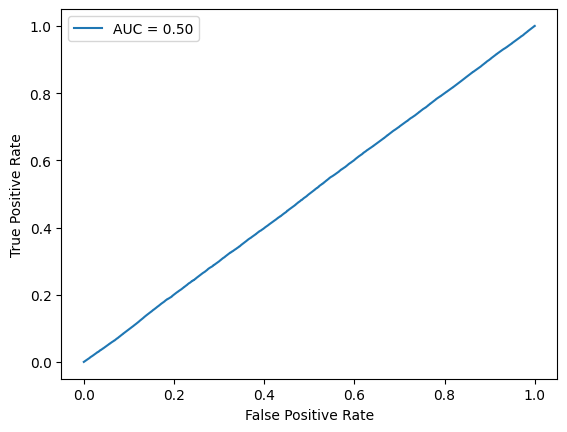

In [37]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_curve, roc_auc_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
english_pred_prob = model.predict([english_padded_sequences, np.zeros_like(english_padded_sequences)])
arabic_pred_prob = model.predict([np.zeros_like(arabic_padded_sequences), arabic_padded_sequences])
english_pred_prob = np.repeat(english_pred_prob, 2)  # Repeat each prediction twice
arabic_pred_prob = np.repeat(arabic_pred_prob, 2)
combined_pred_prob = (english_pred_prob + arabic_pred_prob) / 2
y_pred = (combined_pred_prob > 0.5).astype(int)
accuracy = accuracy_score(labels, y_pred)
f1score = f1_score(labels, y_pred)
recall = recall_score(labels, y_pred)
print('Accuracy:', accuracy)
print('F1-Score:', f1score)
print('Recall:', recall)
fpr, tpr, thresholds = roc_curve(labels, combined_pred_prob)
auc_score = roc_auc_score(labels, combined_pred_prob)
cm = confusion_matrix(labels, y_pred)
print('Confusion Matrix:')
print(cm)

plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


#Save the model

In [ ]:
model.save('/content/drive/myDrive/NLP/model.h5')
